In [5]:
!pip install transformers torch matplotlib
!pip install plotly  


**Load the Emotion Detection Model**

In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_name = "j-hartmann/emotion-english-distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

labels = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]
print("Emotion labels:", labels)


C:\Users\Vampire\AppData\Local\anaconda3\lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Emotion labels: ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']


**the detect_emotions Function**

In [7]:
def detect_emotions(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt")
    
    # Perform inference
    outputs = model(**inputs)
    scores = outputs[0][0].detach().numpy()
    scores = torch.softmax(torch.tensor(scores), dim=0).numpy()  # Convert to probabilities

    # Map scores to emotion labels
    emotion_scores = {label: score for label, score in zip(labels, scores)}
    
    # Print results
    print("Detected Emotions and Intensities:")
    for emotion, intensity in emotion_scores.items():
        print(f"{emotion}: {intensity:.2f}")

# Example usage
text = input("Enter text to analyze emotions: ")
detect_emotions(text)

Enter text to analyze emotions: today the weather is cold and i got stressed
Detected Emotions and Intensities:
anger: 0.69
disgust: 0.00
fear: 0.00
joy: 0.01
neutral: 0.00
sadness: 0.29
surprise: 0.00


**Visualizing Detected Emotions Using a Radar Chart**

Enter text to analyze emotions: today the weather is cold and i got stressed
Detected Emotions and Intensities:
anger: 0.69
disgust: 0.00
fear: 0.00
joy: 0.01
neutral: 0.00
sadness: 0.29
surprise: 0.00


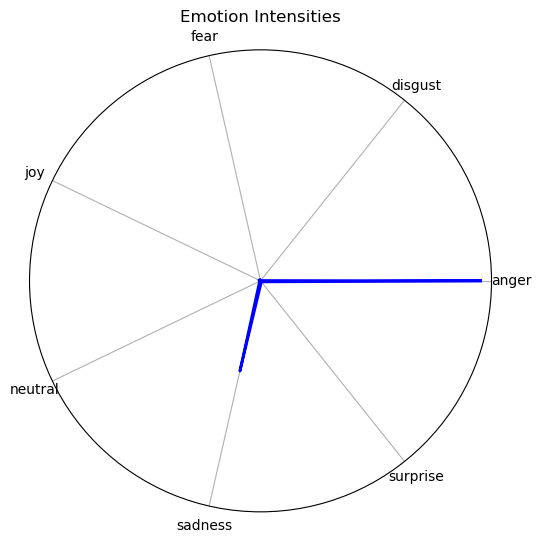

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create radar chart visualization
def plot_emotions(emotion_scores):
    # Prepare data for radar chart
    labels = list(emotion_scores.keys())
    scores = list(emotion_scores.values())
    
    # Create radar chart
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    scores += scores[:1]  # Close the loop
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, scores, color='skyblue', alpha=0.4)
    ax.plot(angles, scores, color='blue', linewidth=2)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Display plot
    plt.title("Emotion Intensities")
    plt.show()

# Updated detect_emotions function to include visualization
def detect_emotions(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    scores = outputs[0][0].detach().numpy()
    scores = torch.softmax(torch.tensor(scores), dim=0).numpy()

    emotion_scores = {label: score for label, score in zip(labels, scores)}
    
    print("Detected Emotions and Intensities:")
    for emotion, intensity in emotion_scores.items():
        print(f"{emotion}: {intensity:.2f}")
    
    # Visualize detected emotions
    plot_emotions(emotion_scores)

# Test the updated function
text = input("Enter text to analyze emotions: ")
detect_emotions(text)


In [9]:
!pip install pyplutchik


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from pyplutchik.plutchik import plutchik
import torch
from pyplutchik import plutchik


# Dummy tokenizer, model, and labels (Replace these with your actual model/tokenizer)
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("nateraw/bert-base-uncased-emotion")
model = AutoModelForSequenceClassification.from_pretrained("nateraw/bert-base-uncased-emotion")
labels = ["anger", "fear", "joy", "love", "sadness", "surprise"]

# Function to create radar chart visualization
def plot_emotions(emotion_scores):
    # Prepare data for radar chart
    labels = list(emotion_scores.keys())
    scores = list(emotion_scores.values())
    
    # Create radar chart
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    scores += scores[:1]  # Close the loop
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, scores, color='skyblue', alpha=0.4)
    ax.plot(angles, scores, color='blue', linewidth=2)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Display plot
    plt.title("Emotion Intensities")
    plt.show()

# Updated detect_emotions function to include visualization
def detect_emotions(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    scores = outputs[0][0].detach().numpy()
    scores = torch.softmax(torch.tensor(scores), dim=0).numpy()

    emotion_scores = {label: score for label, score in zip(labels, scores)}
    
    print("Detected Emotions and Intensities:")
    for emotion, intensity in emotion_scores.items():
        print(f"{emotion}: {intensity:.2f}")
    
    # Visualize detected emotions as radar chart
    plot_emotions(emotion_scores)

    # Visualize emotions using Plutchik's wheel
    plutchik(emotion_scores)

# Test the updated function
text = input("Enter text to analyze emotions: ")
detect_emotions(text)


ModuleNotFoundError: No module named 'pyplutchik.plutchik'

C:\Users\Vampire\AppData\Local\anaconda3\lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

C:\Users\Vampire\AppData\Local\anaconda3\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Vampire\.cache\huggingface\hub\models--nateraw--bert-base-uncased-emotion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Enter text to analyze emotions: the weather is cold and im feelng tired
Detected Emotions and Intensities:
anger: 0.99
fear: 0.00
joy: 0.00
love: 0.01
sadness: 0.00
surprise: 0.00


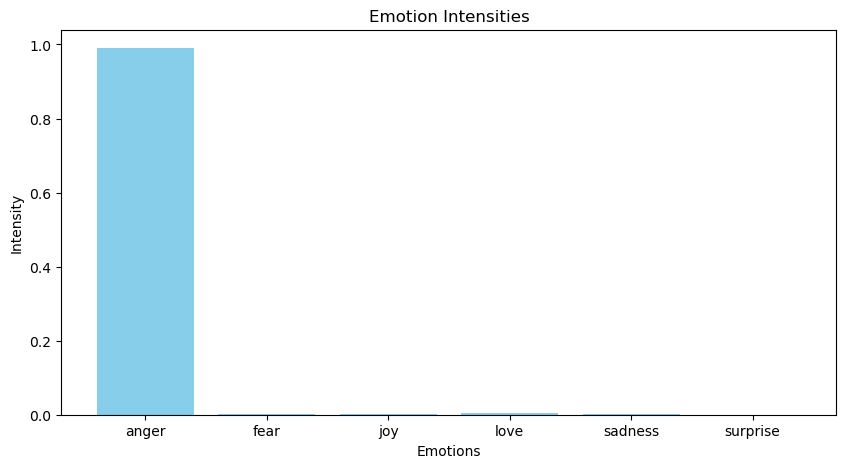

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("nateraw/bert-base-uncased-emotion")
model = AutoModelForSequenceClassification.from_pretrained("nateraw/bert-base-uncased-emotion")
labels = ["anger", "fear", "joy", "love", "sadness", "surprise"]

# Function to visualize emotions
def plot_emotions_bar(emotion_scores):
    emotions = list(emotion_scores.keys())
    scores = list(emotion_scores.values())

    plt.figure(figsize=(10, 5))
    plt.bar(emotions, scores, color='skyblue')
    plt.title("Emotion Intensities")
    plt.xlabel("Emotions")
    plt.ylabel("Intensity")
    plt.show()

# Detect emotions
def detect_emotions(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    scores = outputs[0][0].detach().numpy()
    scores = torch.softmax(torch.tensor(scores), dim=0).numpy()

    emotion_scores = {label: score for label, score in zip(labels, scores)}
    
    print("Detected Emotions and Intensities:")
    for emotion, intensity in emotion_scores.items():
        print(f"{emotion}: {intensity:.2f}")

    # Visualize detected emotions
    plot_emotions_bar(emotion_scores)

# Test the updated function
text = input("Enter text to analyze emotions: ")
detect_emotions(text)


**Facebook API**

In [5]:
!pip install selenium


   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------- ----------------------- 3.9/9.7 MB 19.5 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.7 MB 23.5 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 21.5 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 0.58.0
    Uninstalling websocket-client-0.58.0:
      Successfully uninstalled websocket-client-0.58.0
  Attempting uninstall: sniffio
    Found existing installation: sniffio 1.2.0
    Uninstalling sniffio-1.2.0:
      Successfully uninstalled sniffio-1.2.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0
